In [19]:
# importamos las librerías necesarias para trabajar.
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
pd.set_option("display.max_columns", None)

In [20]:
data = pd.read_csv("datos_TP3.csv", index_col=0)
data = data.sample(20000)


In [21]:
data.isna().sum().sort_values(ascending=False)/data.shape[0]*100

SORS             99.660
Gate             99.360
ContrastName     96.470
Options          82.800
Option           82.800
NoWrap           45.225
ScanMode          9.605
Mode              9.605
Gap               5.145
Scan Comment      3.915
Scan ID           0.005
NAQ               0.000
BW                0.000
Fltr              0.000
Study             0.000
Coverages         0.000
MTX               0.000
FAT               0.000
MTC               0.000
Date              0.000
Site_ID           0.000
Dynamic           0.000
NS                0.000
FOV               0.000
ST                0.000
No                0.000
FA                0.000
TE                0.000
TR                0.000
Time              0.000
Sequence          0.000
Plane             0.000
TxCoil            0.000
RcCoil            0.000
PatientOrient     0.000
Anatomy           0.000
Start             0.000
Site Name         0.000
dtype: float64

In [22]:
data.Anatomy.value_counts(normalize=True)*100


Head         24.410
TL-Spine     18.960
Extremity    18.410
Abdomen      10.960
Shoulder      7.270
Pelvis        7.140
C-Spine       6.990
Ankle         2.310
Chest         2.135
Hand          1.390
???           0.025
Name: Anatomy, dtype: float64

In [23]:
data.head()

,Study,No,Start,Scan ID,Mode,Scan Comment,Anatomy,PatientOrient,RcCoil,TxCoil,ContrastName,Plane,Sequence,Option,ScanMode,Time,TR,TE,FA,NS,ST,Gap,FOV,MTX,NAQ,BW,NoWrap,Options,Fltr,Gate,Coverages,Dynamic,SORS,FAT,MTC,Date,Site_ID,Site Name
32700,10296.8723,1,17:11,AX DWI S(B),(A),AX DWI S(B),Head,H:S,OHD-A,WB,NaN,Oth:Oth,SEEPI2D+0.96,NaN,(A),00:22,3574,96/+0(1),90/180,23,5.0,1.0,23.0,144,1.0,1302,NaN,NaN,NL2,NaN,1,OFF,NaN,ON,OFF,2022-10-12,8629,Sanatorio Franchin
113347,40610.8380,3,02:07,SG PDWI FatSAT,(A),SG PDWI IZQUIERDA,Extremity,F:S,0x47410069,WB,NaN,Oth:Oth,FSE2D+15,NaN,(A),03:27,4403,30,90/180,24,3.5,0.8,16.0,224 x 320,1.0,122,PE,NaN,GA54,NaN,1,OFF,NaN,ON,OFF,2022-08-07,8633,Sanatorio Juncal
50345,40286.8113,7,16:39,T1WI,(A),AX T1WI,Pelvis,F:S,BODY,WB,NaN,Oth:AXp,FSE2D+7.5,NaN,(A),02:28,750,22.5,90/160,30,5.0,1.0,35.0 x 27.0,256 x 352,1.0,326,PE,NaN,GA42,NaN,2,OFF,NaN,OFF,OFF,2022-09-22,8630,Clinica Pequeña Familia
120024,41195.8380,0,03:04,MAP,(A),iMAP,Extremity,F:S,0x47410069,WB,NaN,AX:AP,FE_map,MAP,(A),00:25,185,4,20,23,6.0,4.5,26.3 x 25.6,64,1.0,488,RO,MAP,L1,NaN,1,OFF,NaN,OFF,OFF,2022-08-26,8633,Sanatorio Juncal
13113,35456.8268,4,16:45,DCH PD FatSAT,(A),AX PD FatSAT,Extremity,F:S,8KNEE,WB,NaN,Oth:Oth,FSE2D+12,NaN,(A),03:30,2000,24,90/180,22,3.5,0.7,15.0,256 x 304,2.0,217,NaN,NaN,GA54,NaN,1,OFF,NaN,ON,OFF,2022-10-18,8268,Clínica Modelo de Morón


# Pre - Procesamiento

In [24]:
# Drop Columnas redundantes y que tienen gran cantidad de Nans
data.drop(columns=["SORS", "Gate", "ContrastName", "Options", "Option", "NoWrap", "Site_ID", "Date"], inplace=True)

In [25]:
# Drop filas con Nans restantes
data.dropna(axis=0, inplace=True)

In [26]:
# Elimino las filas con target "???""
data = data[data['Anatomy'] != "???"]

In [27]:
data.Anatomy.value_counts(normalize=True)*100

Head         25.408609
TL-Spine     19.541400
Extremity    18.643357
Abdomen      10.327486
Shoulder      7.064599
Pelvis        7.058612
C-Spine       6.855056
Ankle         2.406753
Hand          1.388972
Chest         1.305155
Name: Anatomy, dtype: float64

# Modelos

In [28]:
# Dividimos

X = data.drop(columns="Anatomy")
y = data.Anatomy

In [29]:
categorical = X.select_dtypes("object").columns

In [30]:
#Train y split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [31]:
# Creo Dummies

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(handle_unknown='ignore')

# Aplicamos OneHotEncoder al conjunto de entrenamiento
X_train = onehot.fit_transform(X_train)

# Aplicamos OneHotEncoder al conjunto de prueba
X_test = onehot.transform(X_test)


In [32]:
# Scalar
from sklearn import preprocessing

scaler = preprocessing.StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SCORES

In [33]:
# Funcion para Scores

resultados_fin = pd.DataFrame()

def evaluacion(y_test, y_pred, model=""):
    # Crear diccionario para almacenar los resultados
    resultados = {}

      # Calcular sensibilidad
    sensibilidad = metrics.recall_score(y_test, y_pred, average='macro')
    resultados['Sensibilidad'] = sensibilidad

    # Calcular accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    resultados['Accuracy'] = accuracy

    # Calcular precision
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    resultados['Precision'] = precision

    # Graficar matrix de confusion con heatmap
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=np.unique(y_test).tolist(), yticklabels=np.unique(y_pred).tolist())
    plt.title('Matrix de Confusion')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predicho')
    plt.show()

    resultado_df = pd.DataFrame.from_dict(resultados, orient='index', columns=[model])
    resultados_fin[model] = resultado_df 
    return resultados_fin


# MODELOS


## Logistic Regression


In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_scaled, y_train)

ypred_lr = lr.predict(X_test_scaled)


c:\Users\jpans\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


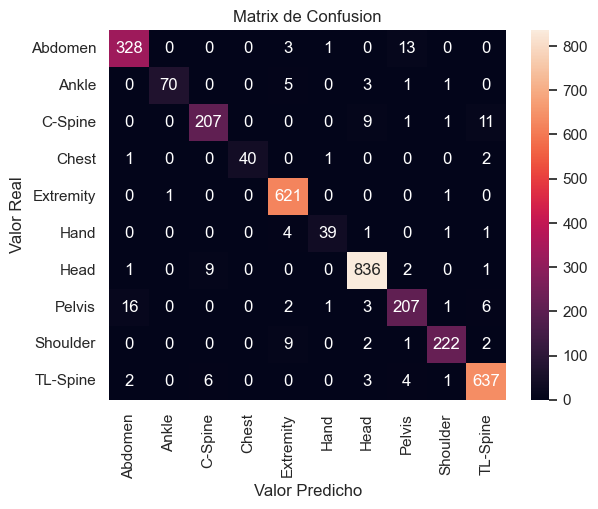

,Logistic_Regression
Sensibilidad,0.926134
Accuracy,0.959892
Precision,0.957200


In [35]:
evaluacion(y_test, ypred_lr, model="Logistic_Regression")

## Naive Bayes

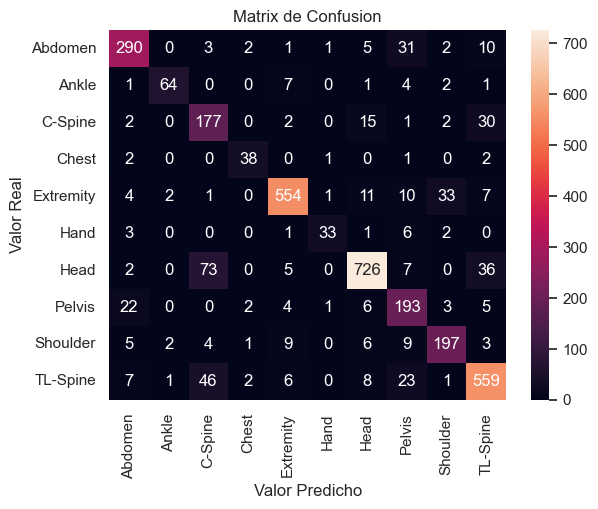

,Logistic_Regression,Naive_Bayes
Sensibilidad,0.926134,0.824749
Accuracy,0.959892,0.847351
Precision,0.957200,0.832393


In [36]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_scaled.toarray(), y_train)

ypred_gnb = gnb.predict(X_test_scaled.toarray())
evaluacion(y_test, ypred_gnb, model="Naive_Bayes")

## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Hyperparametros
parameters_knn = {"n_neighbors" : list(range(1, 15))}

clf_knn = GridSearchCV(knn, 
                   param_grid = parameters_knn, 
                   refit = True, 
                   cv = 5,
                   verbose=1,
                   n_jobs = -1) 
                   

# Fit el modelo ya seleccionado
clf_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [ ]:
print("Los mejores parametros fueron %s con un score de %0.2f" % (clf_knn.best_params_, clf_knn.best_score_))

In [ ]:
ypred_knn = clf_knn.predict(X_test_scaled)

In [ ]:
evaluacion(y_test, ypred_knn, model="KNN")